1. Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

2. load the dataset

In [2]:
df = pd.read_csv("Quality of Service 5G.csv")

In [3]:
df.head()


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [5]:
df.describe()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400,400,400,400,400,400,400
unique,7,400,11,84,87,188,194,9
top,9/3/2023 10:01,User_1,Video_Call,-97 dBm,5 ms,0.1 Mbps,0.1 Mbps,70%
freq,60,1,58,9,35,16,16,148


In [6]:
def mbps_to_kbps(value):
    if 'Mbps' in value:
        n = float(value.replace(' Mbps',''))
        return str(n*1000)+' Kbps'
    else:
        return value


df['Required_Bandwidth'] = df['Required_Bandwidth'].map(mbps_to_kbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].map(mbps_to_kbps)

In [7]:
df['Signal_Strength'] = df['Signal_Strength'].str.extract('(-\d+)').astype(int)
df['Latency'] = df['Latency'].str.extract('(\d+)').astype(int)
df['Required_Bandwidth'] = df['Required_Bandwidth'].str.extract('(\d+)').astype(float)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.extract('(\d+)').astype(float)
df['Resource_Allocation'] = df['Resource_Allocation'].str.extract('(\d+)').astype(int)

In [8]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75,30,10000.0,15000.0,70
1,9/3/2023 10:00,User_2,Voice_Call,-80,20,100.0,120.0,80
2,9/3/2023 10:00,User_3,Streaming,-85,40,5000.0,6000.0,75
3,9/3/2023 10:00,User_4,Emergency_Service,-70,10,1000.0,1500.0,90
4,9/3/2023 10:00,User_5,Online_Gaming,-78,25,2000.0,3000.0,85


In [9]:
df.describe()

,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400.000000,400.000000,400.000000,400.00000,400.000000
mean,-80.495000,33.825000,3135.512500,3502.38000,74.712500
std,20.701119,21.122139,3984.096715,4460.80117,8.982291
min,-123.000000,0.000000,0.000000,0.00000,50.000000
25%,-98.000000,21.750000,417.500000,417.50000,70.000000
50%,-83.000000,31.000000,1200.000000,1350.00000,70.000000
75%,-64.000000,45.000000,4100.000000,4425.00000,80.000000
max,-40.000000,110.000000,14500.000000,15800.00000,90.000000


3. Check for null values

In [10]:
df.isna().any()

Timestamp              False
User_ID                False
Application_Type       False
Signal_Strength        False
Latency                False
Required_Bandwidth     False
Allocated_Bandwidth    False
Resource_Allocation    False
dtype: bool

In [11]:
df.isna().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [12]:
df.shape

(400, 8)

4. DataVisualisation - Box plot for checking outliers

<Axes: xlabel='Resource_Allocation', ylabel='count'>

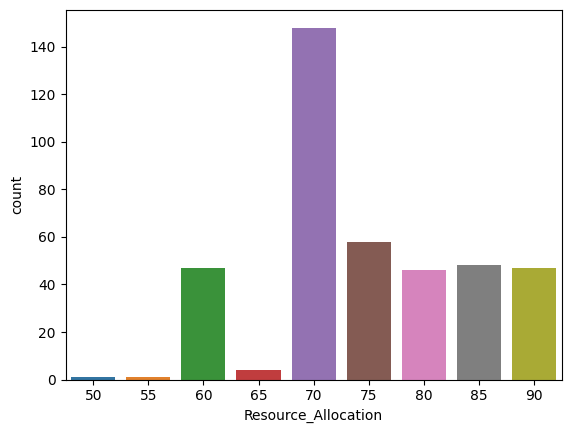

In [13]:
sns.countplot(x=df['Resource_Allocation'])

<Axes: >

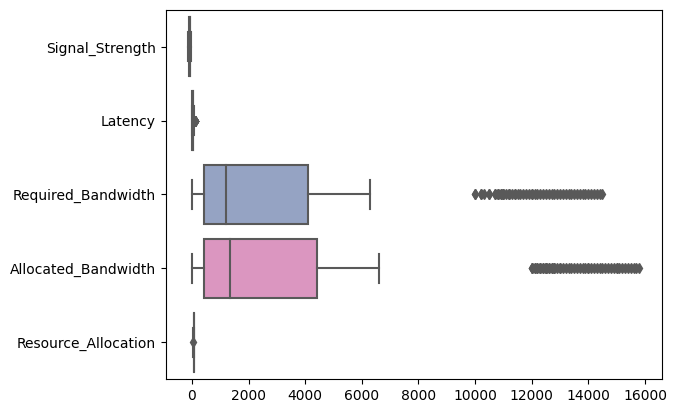

In [14]:
sns.boxplot(data=df, orient="h", palette="Set2")

<Axes: >

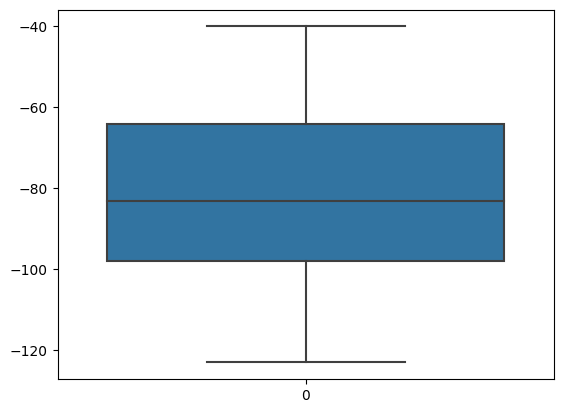

In [15]:
sns.boxplot(df.Signal_Strength)

<Axes: >

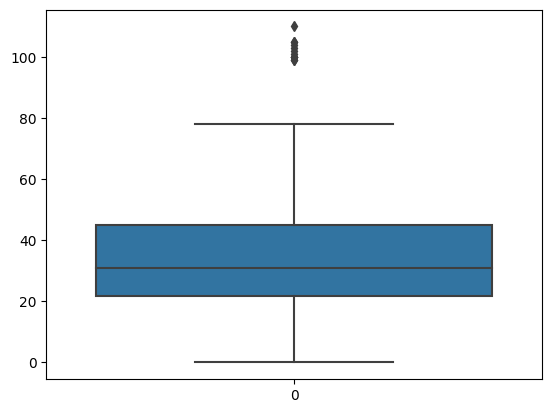

In [16]:
sns.boxplot(df.Latency)

<Axes: >

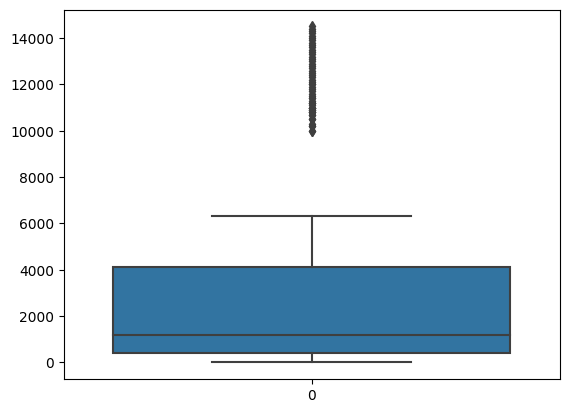

In [17]:
sns.boxplot(df.Required_Bandwidth)

<Axes: >

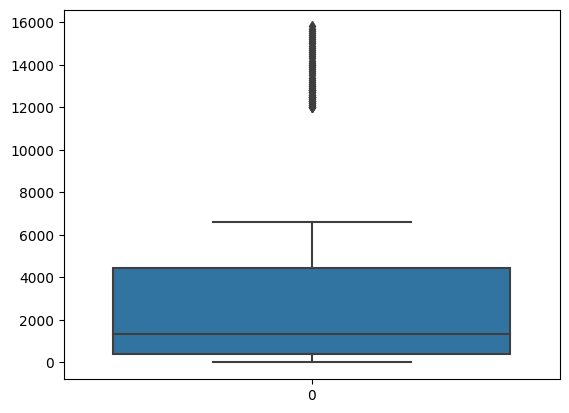

In [18]:
sns.boxplot(df.Allocated_Bandwidth)

<Axes: >

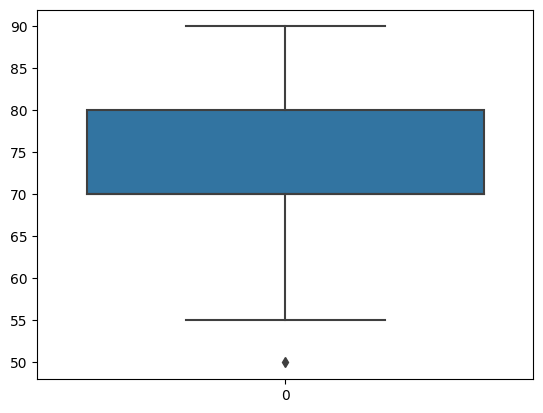

In [19]:
sns.boxplot(df.Resource_Allocation)

In [20]:
df.median()

<ipython-input-20-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Signal_Strength         -83.0
Latency                  31.0
Required_Bandwidth     1200.0
Allocated_Bandwidth    1350.0
Resource_Allocation      70.0
dtype: float64

In [21]:
Q1 = np.percentile(df['Latency'], 25, method='midpoint')
Q3 = np.percentile(df['Latency'], 75, method='midpoint')

IQR = Q3-Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_val = np.where(df['Latency'] >= upper)
lower_val = np.where(df['Latency'] <= lower)

# Removing the outliers
df.drop(upper_val[0], inplace=True)
df.drop(lower_val[0], inplace=True)

<Axes: >

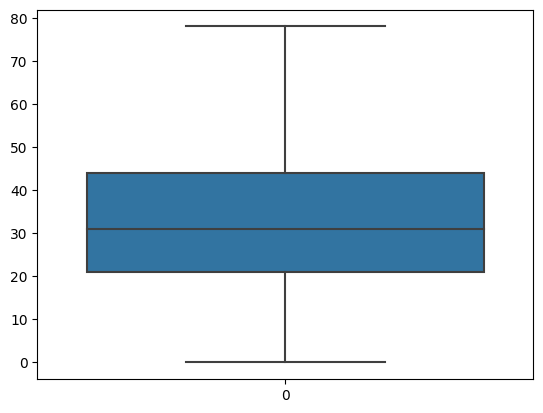

In [22]:
sns.boxplot(df.Latency)

<Axes: >

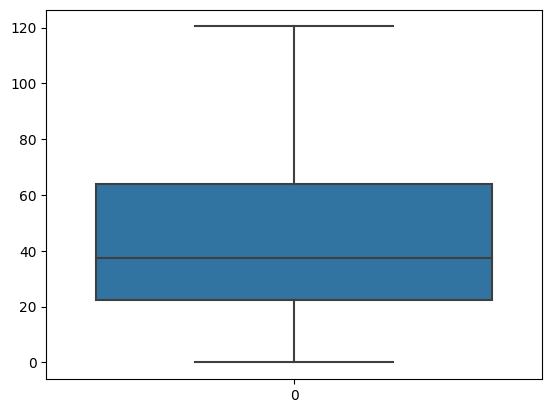

In [23]:
df['Required_Bandwidth'] = np.sqrt(df['Required_Bandwidth'])
sns.boxplot(data=df['Required_Bandwidth'])

In [24]:
q12 = df.Allocated_Bandwidth.quantile(0.25)
q32 = df.Allocated_Bandwidth.quantile(0.75)
IQR2 = q32-q12
upper_limit2 = q32+1.5*IQR2

In [25]:
df['Allocated_Bandwidth'] = np.where(df['Allocated_Bandwidth']>upper_limit2,4,df['Allocated_Bandwidth'])

<Axes: >

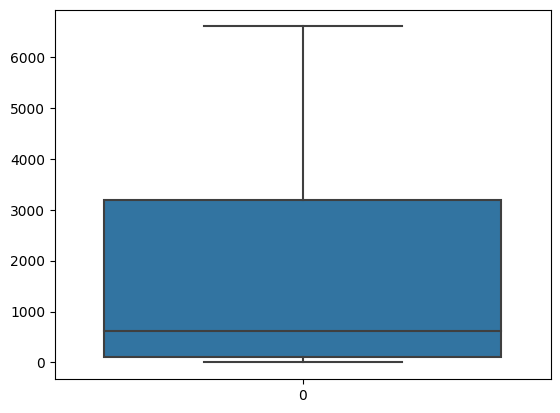

In [26]:
sns.boxplot(df.Allocated_Bandwidth)

<Axes: >

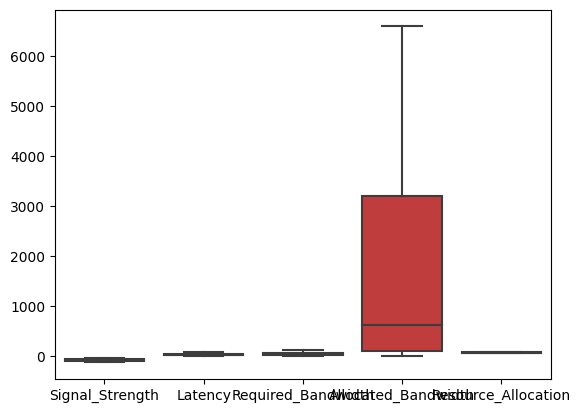

In [27]:
sns.boxplot(data=df)

5.Splitting Dependent and Independent variables

In [28]:
x=df.iloc[:,2:7]
x.head()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth
0,Video_Call,-75,30,100.000000,4.0
1,Voice_Call,-80,20,10.000000,120.0
2,Streaming,-85,40,70.710678,6000.0
3,Emergency_Service,-70,10,31.622777,1500.0
4,Online_Gaming,-78,25,44.721360,3000.0


In [29]:
y=df["Resource_Allocation"]
y.head()

0    70
1    80
2    75
3    90
4    85
Name: Resource_Allocation, dtype: int64

6.Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [31]:
x["Application_Type"]=le.fit_transform(x["Application_Type"])

In [32]:
print(le.classes_)

['Background_Download' 'Emergency_Service' 'File_Download' 'Online_Gaming'
 'Streaming' 'Video_Call' 'Video_Streaming' 'VoIP_Call' 'Voice_Call'
 'Web_Browsing']


In [33]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'Background_Download': 0,
 'Emergency_Service': 1,
 'File_Download': 2,
 'Online_Gaming': 3,
 'Streaming': 4,
 'Video_Call': 5,
 'Video_Streaming': 6,
 'VoIP_Call': 7,
 'Voice_Call': 8,
 'Web_Browsing': 9}

7.Feature scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [35]:
x_Scaled=ms.fit_transform(x)

In [36]:
x_Scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [37]:
x_Scaled.head()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth
0,0.555556,0.578313,0.384615,0.830455,0.000606
1,0.888889,0.518072,0.256410,0.083045,0.018182
2,0.444444,0.457831,0.512821,0.587220,0.909091
3,0.111111,0.638554,0.128205,0.262613,0.227273
4,0.333333,0.542169,0.320513,0.371391,0.454545


8.Train test split

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_Scaled,y,test_size =0.2,random_state =0)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(309, 5) (78, 5) (309,) (78,)


9.Model Building

9.1 - Linear Regression Model

In [40]:
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred = modellr.predict(x_test)

In [42]:
y_pred

array([68.56690199, 79.53485731, 75.07324371, 72.37944065, 73.60077486,
       81.25566973, 72.98142866, 75.82624259, 74.74353981, 73.05412763,
       77.17197843, 73.21953836, 80.36713139, 84.53838024, 80.76272928,
       77.8825597 , 78.09773775, 78.65698746, 81.2394203 , 64.77121934,
       71.17784926, 79.66074441, 78.40242628, 71.21165766, 64.00977775,
       71.93386729, 72.53365662, 77.8713174 , 78.86264516, 74.14664512,
       84.95644031, 87.1310888 , 89.22475677, 62.49251887, 81.49435305,
       80.85343276, 77.33666609, 86.52044832, 74.8545608 , 78.39106254,
       76.53587544, 69.82493706, 74.16415631, 72.89393401, 79.05673841,
       68.68359983, 80.0498416 , 77.6265127 , 63.24757174, 77.00600429,
       75.91749834, 68.83164556, 72.79389213, 75.56304618, 66.69817894,
       79.65230965, 79.68021644, 79.83016062, 63.37414591, 85.07393951,
       64.90687086, 77.21105582, 80.28668398, 74.71070474, 82.00137505,
       74.9019524 , 75.20873312, 83.70915565, 70.1930808 , 77.60

In [43]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
r2

0.3281002378741138

In [44]:
mse = mean_squared_error(y_test, y_pred)
mse

49.953494395725095

In [45]:
rmse = np.sqrt(mse)
rmse

7.0677786040399635

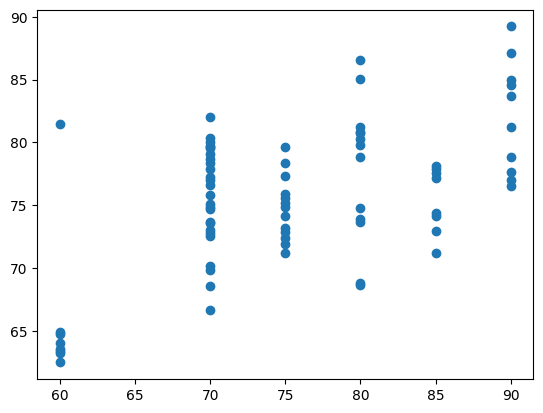

In [46]:
plt.scatter(y_test, y_pred)
plt.show()

9.2.Random Forest regressor model

In [47]:
from sklearn.ensemble import RandomForestRegressor
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,r2_score

modelrf = RandomForestRegressor()

modelrf.fit(x_train, y_train)

ypr = modelrf.predict(x_test)

ypr

accc= r2_score (y_test,ypr)
accc

0.8825438096807838

In [48]:
pred_result = modelrf.predict(x_test)
print(pred_result)

[70.55       70.         70.         75.         70.         90.
 84.85       70.         80.1        70.         84.1        82.8
 70.65       90.         80.1        84.4        83.8        70.
 80.1        60.         84.25       75.         75.         75.
 60.         75.         70.         70.         80.05       75.
 90.         90.         90.         60.         69.71666667 87.65
 75.         79.9        75.         70.         89.3        70.
 85.         82.7        70.         71.6        70.         89.95
 60.         70.         75.         70.25       70.         75.
 56.4        70.         71.2        73.3        60.         79.95
 60.         70.         80.         70.         69.18130952 70.
 75.         90.         70.         84.85       89.95       81.
 82.2        89.6        69.96       60.         85.         70.        ]


In [49]:
filename = 'modelrff.pkl'
pickle.dump(modelrf,open(filename,'wb'))

In [50]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([70.55      , 70.        , 70.        , 75.        , 70.        ,
       90.        , 84.85      , 70.        , 80.1       , 70.        ,
       84.1       , 82.8       , 70.65      , 90.        , 80.1       ,
       84.4       , 83.8       , 70.        , 80.1       , 60.        ,
       84.25      , 75.        , 75.        , 75.        , 60.        ,
       75.        , 70.        , 70.        , 80.05      , 75.        ,
       90.        , 90.        , 90.        , 60.        , 69.71666667,
       87.65      , 75.        , 79.9       , 75.        , 70.        ,
       89.3       , 70.        , 85.        , 82.7       , 70.        ,
       71.6       , 70.        , 89.95      , 60.        , 70.        ,
       75.        , 70.25      , 70.        , 75.        , 56.4       ,
       70.        , 71.2       , 73.3       , 60.        , 79.95      ,
       60.        , 70.        , 80.        , 70.        , 69.18130952,
       70.        , 75.        , 90.        , 70.        , 84.85

In [51]:
pickle.dump(le, open('label_encoder.pkl', 'wb'))
pickle.dump(ms, open('scaler.pkl', 'wb'))

In [52]:
with open('modelrff.pkl', 'wb') as file:
    pickle.dump(modelrf, file)

In [53]:
with open('modelrff.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [54]:
modelrf.fit(x_train.values, y_train.values)
data_pred = modelrf.predict(x_test.values)

In [55]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75,30,100.000000,4.0,70
1,9/3/2023 10:00,User_2,Voice_Call,-80,20,10.000000,120.0,80
2,9/3/2023 10:00,User_3,Streaming,-85,40,70.710678,6000.0,75
3,9/3/2023 10:00,User_4,Emergency_Service,-70,10,31.622777,1500.0,90
4,9/3/2023 10:00,User_5,Online_Gaming,-78,25,44.721360,3000.0,85


In [56]:
prediction = modelrf.predict([[1,	-70	,10.0	,31.0,1500.0]])

In [57]:
prediction

array([70.10416667])

In [58]:
score = modelrf.score(x_test, y_test)
score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.8806808749616024

9.3 - decision tree regresoor

In [59]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor(random_state = 65)

modeldt = dt.fit(x_train, y_train)

ypre = dt.predict(x_test)

ac= r2_score (y_test,ypre)

ac

0.8749792737522799

In [60]:
with open('modeldt.pkl', 'wb') as file:
    pickle.dump(modeldt, file)

In [61]:
with open('modeldt.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [62]:
prediction = modelrf.predict([[1,	-42	,5,400	,400.0	]])

In [63]:
prediction

array([70.10416667])

9.4 - KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
modelknn=KNeighborsClassifier()
modelknn.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
score = modelknn.score(x_test, y_test)
score

0.8974358974358975

In [66]:
y_pred=modelknn.predict(x_test)

In [67]:
y_pred

array([70, 70, 70, 75, 70, 90, 85, 70, 80, 70, 85, 80, 70, 90, 80, 85, 85,
       70, 80, 60, 85, 75, 75, 75, 60, 75, 70, 70, 80, 75, 90, 90, 90, 60,
       70, 90, 75, 80, 75, 70, 90, 70, 85, 80, 70, 70, 70, 90, 60, 70, 75,
       70, 70, 75, 60, 70, 70, 70, 60, 80, 60, 70, 80, 70, 70, 70, 75, 90,
       70, 85, 90, 80, 80, 90, 70, 60, 85, 70])

In [68]:
y_test

60     70
137    70
325    70
188    75
294    70
       ..
100    90
389    70
117    60
259    85
261    70
Name: Resource_Allocation, Length: 78, dtype: int64

In [69]:
with open('modelknn.pkl', 'wb') as file:
    pickle.dump(modelknn, file)

In [70]:
with open('modelknn.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [71]:
modelknn.fit(x_train.values, y_train.values)
data_pred = modelknn.predict(x_test.values)

In [72]:
prediction = modelrf.predict([[1,	-42	,5,400	,400.0	]])

In [73]:
prediction

array([70.10416667])

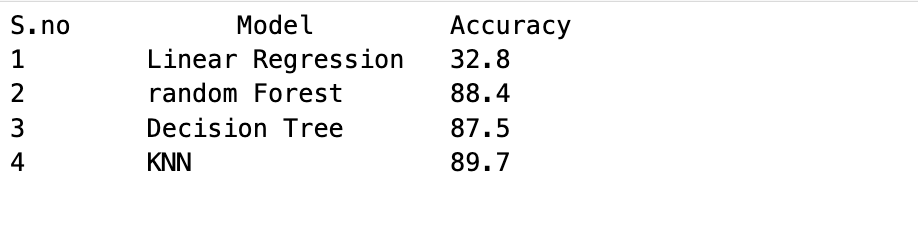